Obraz wczytany pomyślnie. Wymiary macierzy X: (532, 800)


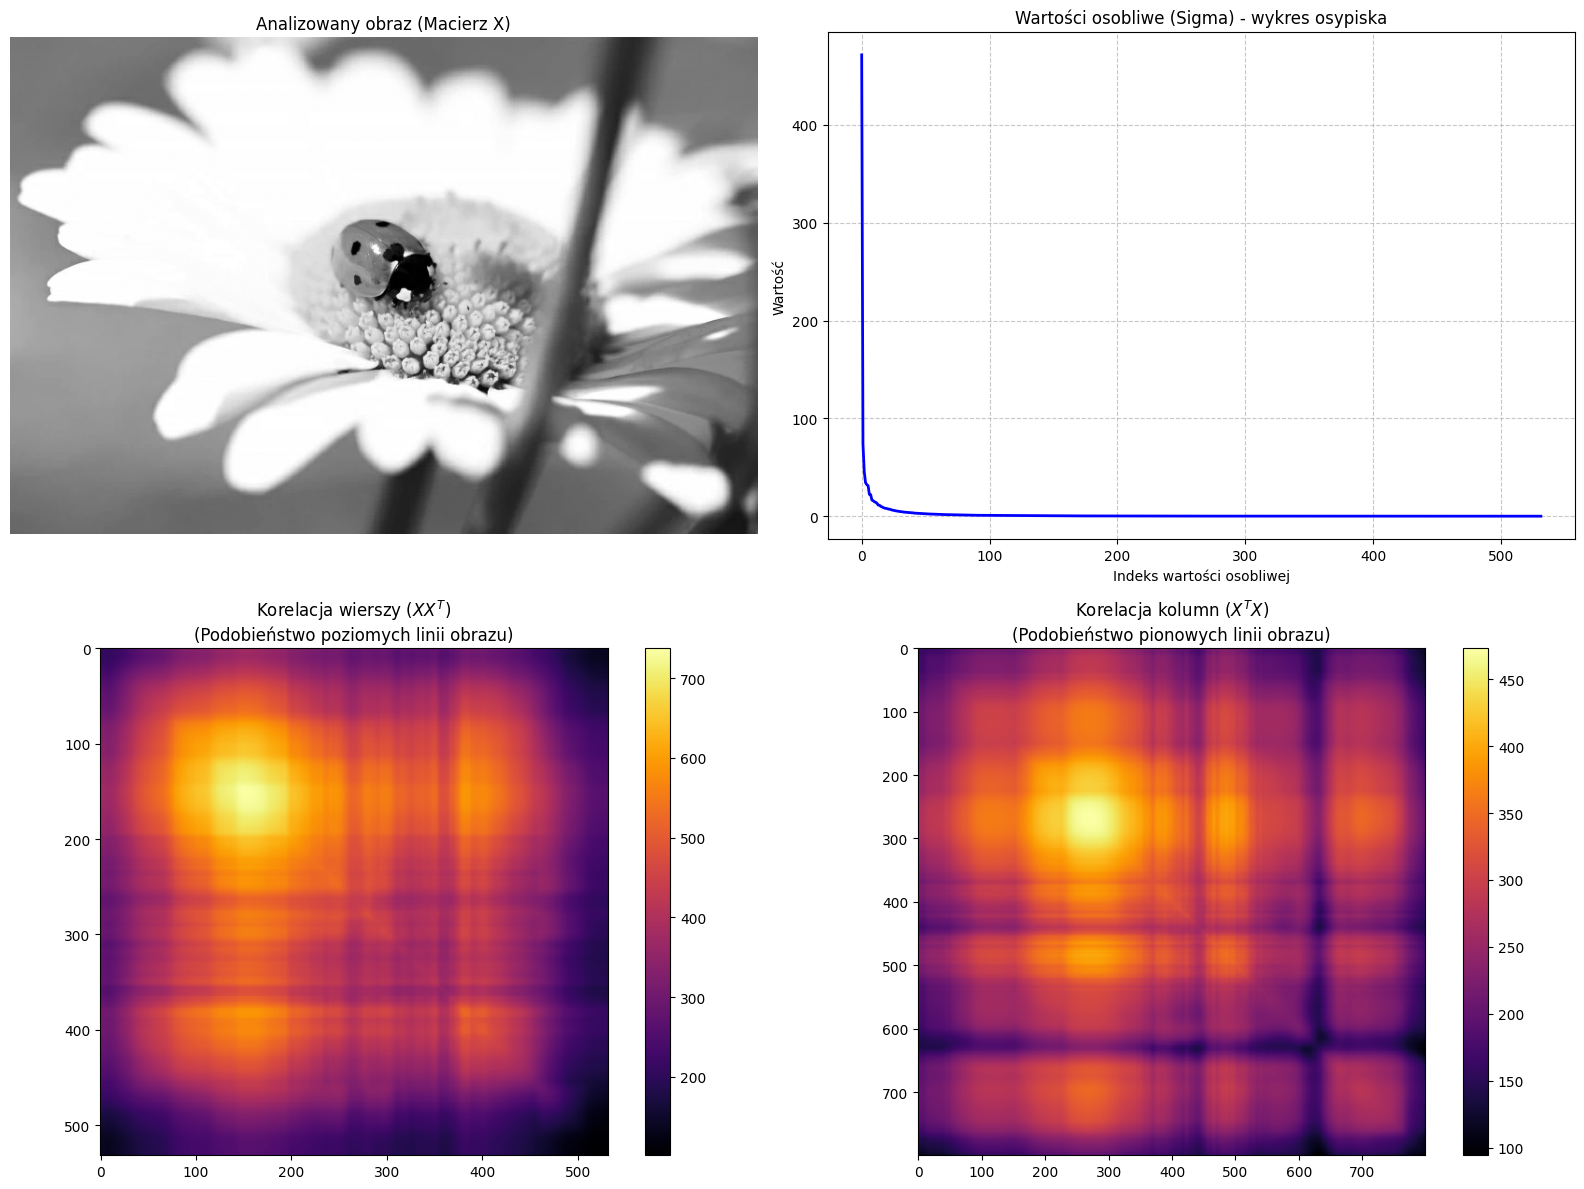

Błąd rekonstrukcji macierzy korelacji kolumn: 1.34e-09


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage.color import rgb2gray

# --- Wczytanie i przygotowanie obrazu ---
filename = '8.webp'

try:
    img_color = mpimg.imread(filename)

    if img_color.shape[2] == 4:
        img_color = img_color[:, :, :3]

    X = rgb2gray(img_color)
    print(f"Obraz wczytany pomyślnie. Wymiary macierzy X: {X.shape}")

except FileNotFoundError:
    print(f"Błąd: Nie znaleziono pliku '{filename}'. Upewnij się, że jest w tym samym folderze.")

    X = np.random.rand(500, 500)


U, s, Vt = np.linalg.svd(X, full_matrices=False)
Sigma = np.diag(s)

V = Vt.T

# Korelacja kolumn: X^T X = V * Sigma^2 * V^T
XtX_svd = V @ (Sigma ** 2) @ Vt

# Korelacja wierszy: X X^T = U * Sigma^2 * U^T
XXt_svd = U @ (Sigma ** 2) @ U.T

# --- Wizualizacja ---
plt.figure(figsize=(16, 12))

# A. Oryginalny obraz (w skali szarości dla spójności)
plt.subplot(2, 2, 1)
plt.imshow(X, cmap='gray')
plt.title("Analizowany obraz (Macierz X)")
plt.axis('off')

# B. Wykres wartości osobliwych
plt.subplot(2, 2, 2)
plt.plot(s, color='blue', linewidth=2)
plt.title("Wartości osobliwe (Sigma) - wykres osypiska")
plt.xlabel("Indeks wartości osobliwej")
plt.ylabel("Wartość")
plt.grid(True, linestyle='--', alpha=0.7)

# C. Macierz korelacji wierszy (XX^T)
plt.subplot(2, 2, 3)
plt.imshow(XXt_svd, cmap='inferno', interpolation='nearest')
plt.title("Korelacja wierszy ($XX^T$)\n(Podobieństwo poziomych linii obrazu)")
plt.colorbar()

# D. Macierz korelacji kolumn (X^T X)
plt.subplot(2, 2, 4)
plt.imshow(XtX_svd, cmap='inferno', interpolation='nearest')
plt.title("Korelacja kolumn ($X^T X$)\n(Podobieństwo pionowych linii obrazu)")
plt.colorbar()

plt.tight_layout()
plt.show()

XtX_check = X.T @ X
diff = np.linalg.norm(XtX_svd - XtX_check)
print(f"Błąd rekonstrukcji macierzy korelacji kolumn: {diff:.2e}")